<a href="https://colab.research.google.com/github/srishticodes/Dataanalysis/blob/main/Unsuperprob1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     position    mapping
0           0  47.242317
1           1  45.672753
2           2  43.325324
3           3  43.989512
4           4  44.676021
..        ...        ...
995       995  46.164777
996       996  45.394748
997       997  44.185592
998       998  42.483996
999       999  45.480602

[1000 rows x 2 columns]


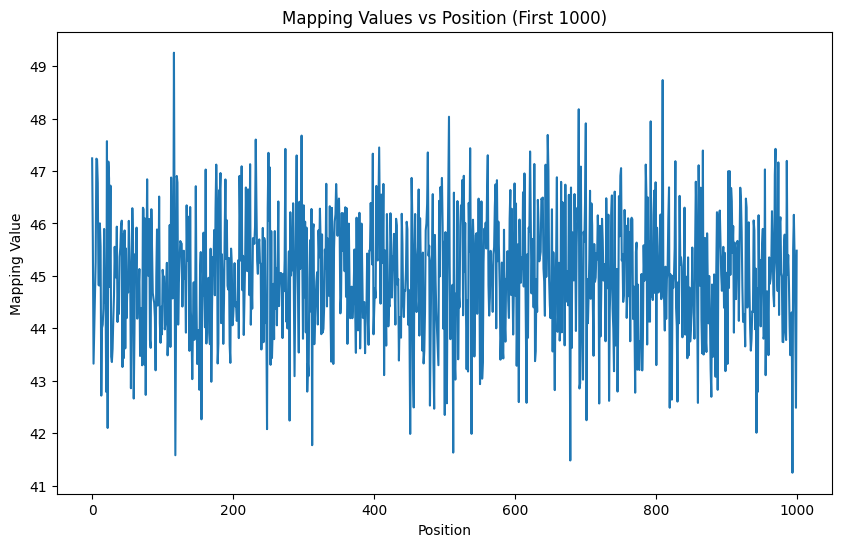


Positions where mapping value > 4000:
        position      mapping
452492    452492  4000.215432
452493    452493  4000.761577
452498    452498  4000.204169
452499    452499  4000.729387
452501    452501  4000.137308
...          ...          ...
454075    454075  4000.217834
454076    454076  4000.152705
454077    454077  4000.199233
454078    454078  4000.111674
454079    454079  4000.122937

[793 rows x 2 columns]

DataFrame after filling NaN values:
   position    mapping
0         0  47.242317
1         1  45.672753
2         2  43.325324
3         3  43.989512
4         4  44.676021


In [ ]:
# prompt: Create a Data Frame with the following conditions
# a)There would be two columns. The first column will be positioncoordinates starting from 0 to 2M(million)
# b)The second column will have position mapping values will randomly
# chosen such that it follows a normal (Gaussian) distribution with mean 45
# and standard deviation
# 1.2. Create 2M such values. Display only the first 1000 records, and plot
# the mapping values position wise. Hints: May use random.normal()
# c)Use the mask() method of panda dataframe to replace values of specific
# regions in the second column of the dataframe. Select a random position
# P and replace all values in the position [P, P+L], (where L is a random
# length in the range 1000,5000] in the region) with values randomly
# chosen such that it follows a normal distribution (Gaussian)with mean
# 4000 and standard deviation .5 .
# d) Within the above region [P, P+L] select 3 positions and mask it with
# missing value represented by NaN.
# Hints :
# data = {
# "age": [50, 40, 30, 40, 20, 10, 30],
# "qualified": [True, False, False, False, False, True, True]
# }
# df = pd.DataFrame(data)
# newdf = df.mask(df["age"] > 30)
# e) Display all position where the mapping value is >4000
# f) Replace all missing values with 999

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# a) Create the DataFrame
n = 2_000_000  # 2 million
position_coordinates = np.arange(n)
mapping_values = np.random.normal(45, 1.2, n)
df = pd.DataFrame({'position': position_coordinates, 'mapping': mapping_values})

# b) Display the first 1000 records and plot the mapping values
print(df.head(1000))
plt.figure(figsize=(10, 6))
plt.plot(df['position'][:1000], df['mapping'][:1000])
plt.xlabel('Position')
plt.ylabel('Mapping Value')
plt.title('Mapping Values vs Position (First 1000)')
plt.show()

# c) Mask specific regions
P = random.randint(0, n - 5001)  # Ensure P + L is within bounds
L = random.randint(1000, 5000)

# Create a boolean mask for the specified region
mask = (df['position'] >= P) & (df['position'] <= P + L)

# Generate new mapping values for the masked region
new_mapping_values = np.random.normal(4000, 0.5, sum(mask))

# Replace values in the masked region
df.loc[mask, 'mapping'] = new_mapping_values

# d) Introduce NaN values within the masked region
nan_positions = sorted(random.sample(range(P, P+L+1), 3)) # Select 3 distinct random positions
for pos in nan_positions:
    df.loc[df['position'] == pos, 'mapping'] = np.nan

# e) Display positions where mapping values > 4000
print("\nPositions where mapping value > 4000:")
print(df[df['mapping'] > 4000])


# f) Replace NaN values with 999
df.fillna(999, inplace=True)
print("\nDataFrame after filling NaN values:")
print(df.head()) #Displaying the first 5 for brevity, you can remove .head() to show all.




Number of regions with mapping values < 12: 0

Positions and mapping values for regions < 12:
Empty DataFrame
Columns: [position, mapping]
Index: []


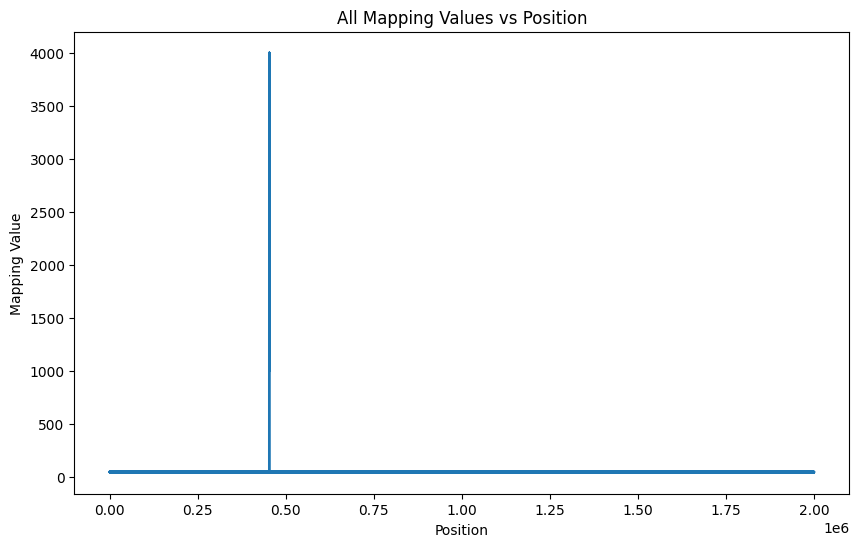


Classifier: Logistic Regression
Confusion Matrix:
[[   313      0]
 [     0 399687]]

Classification Report:
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       313
      Normal       1.00      1.00      1.00    399687

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000

Accuracy: 1.0

Classifier: Decision Tree
Confusion Matrix:
[[   313      0]
 [     0 399687]]

Classification Report:
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00       313
      Normal       1.00      1.00      1.00    399687

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000

Accuracy: 1.0

Classifier: Random Forest
Confusion Matrix:
[[   313      0]
 [     0 399687]]

Classification Report:


In [ ]:
# prompt: ) Count the number of regions having mapping values <12. Display the
# positions for those regions along with their mapping values. Plot all the
# mapping values position wise.
# h) Add another column to the above frame as a class level column having
# two classes Normal and Abnormal. The region having mapping greater
# than a threshold 3000 will be abnormal , otherwise normal.
# i) Remove all instances having values 999
# ii) Create test and training sets from the above dataset
# iii) Classify it with three classifier and compare the classifiers with
# the help of performance metrics. Print the confusion metrics of
# each classifier, and the accuracy of each.

import matplotlib.pyplot as plt
import numpy as np
# g) Count regions with mapping values < 12
regions_less_than_12 = df[df['mapping'] < 12]
print("\nNumber of regions with mapping values < 12:", len(regions_less_than_12))
print("\nPositions and mapping values for regions < 12:")
print(regions_less_than_12[['position', 'mapping']])

plt.figure(figsize=(10, 6))
plt.plot(df['position'], df['mapping'])
plt.xlabel('Position')
plt.ylabel('Mapping Value')
plt.title('All Mapping Values vs Position')
plt.show()

# h) Add class level column
threshold = 3000
df['class'] = np.where(df['mapping'] > threshold, 'Abnormal', 'Normal')

# i) Remove instances with values 999
df = df[df['mapping'] != 999]

# ii) Create test and training sets
from sklearn.model_selection import train_test_split

X = df[['position', 'mapping']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# iii) Classify with three classifiers and compare
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\nClassifier: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
